Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [26]:
# print the first 5 rows of the DataFrame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [27]:
# print the last 5 rows of the DataFrame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [29]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [31]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [32]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [33]:
# getting statistical information about the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [34]:
# creating a temporary dataframe with only the numerical columns, because the corr() function can only work with columns that contain numerical values
numerical_data = gold_data.select_dtypes(include=['float64', 'int64'])

In [35]:
# calculate the correlation
correlation = numerical_data.corr()

<Axes: >

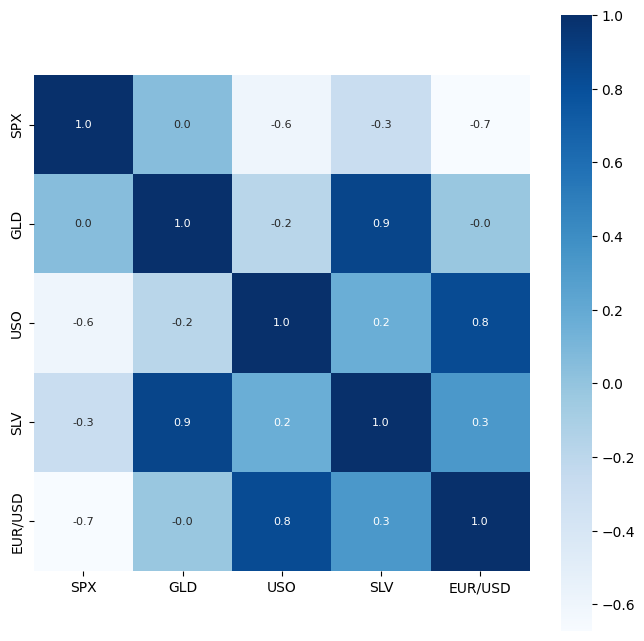

In [6]:
# contructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [7]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


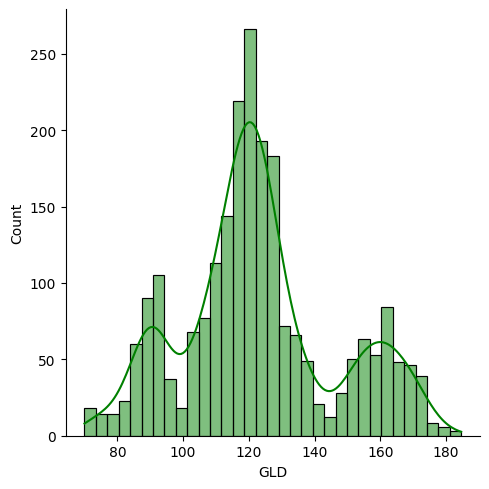

In [11]:
# check the distribuition of the GLD price
sns.displot(gold_data['GLD'], color='green', kde=True)

Splitting the Features and the Target

In [14]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [20]:
# prediction of Test Data
test_data_prediction = regressor.predict(X_test)

In [21]:
print(test_data_prediction)

[168.57399919  82.14039981 116.41770043 127.843901   120.9434011
 154.60309815 150.44399846 125.95510005 117.45629873 126.06400076
 116.7474012  171.30740096 141.53269918 167.72869896 115.1948998
 117.44650043 140.64150267 169.84280152 159.66000266 159.70399911
 155.16210048 125.24780007 175.91389916 157.71220338 125.18280034
  93.80169947  77.3007006  120.45259987 119.10649961 167.41740033
  88.26900056 125.22360017  91.33930045 117.92919998 121.15009923
 136.61030061 115.38920091 115.30320085 146.10969975 107.05260089
 104.81870257  87.09339792 126.48600064 118.11890018 154.96329894
 119.69590021 108.31900013 108.09829834  93.20640044 127.18559766
  75.34840017 113.70519917 121.5230001  111.11199912 118.86559867
 120.1883996  159.08179942 168.00130144 147.03109693  85.66969836
  94.28220038  86.85709904  90.49850021 118.99830067 126.46330052
 127.63920004 168.68390033 122.27159965 117.30699923  98.64250065
 168.64870134 142.93069801 131.53510311 121.1887022  120.54659942
 119.6160008

In [22]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R square error: ", error_score)

R square error:  0.988809028344931


Compare the actual Values and Predicted Values in a Plot

In [23]:
Y_test = list(Y_test)

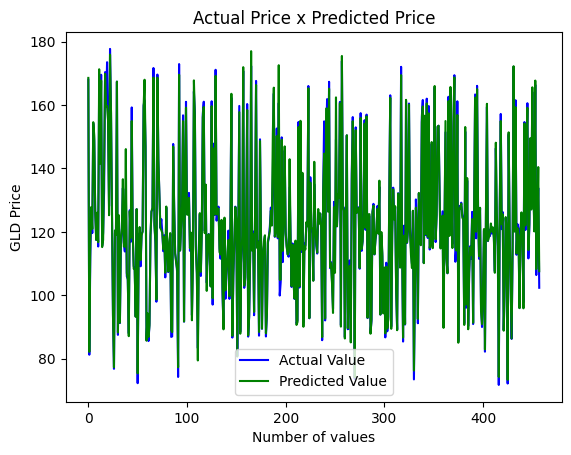

In [25]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label = 'Predicted Value')
plt.title('Actual Price x Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()